# 2.4 Statistical Decision Theory

This section gives a framework of making statistical decision of choosing 
a __model__ ($f(X)$) to predict $Y$. Afterall, we are talking about
supervised learning in this chatper, therefore we need a statistical decision
theroy. 

The question will be: __how should we choose a function $f$__? 

A criterion for choosing $f$,

$\begin{aligned} \operatorname{EPE}(f) &=\int[y-f(x)]^{2} \operatorname{Pr}(d x, d y) \\ &=\int[y-f(x)]^{2} p(x, y) d x d y \\ &=\int_{x} \int_{y}[y-f(x)]^{2} p(x, y) d x d y \\ &=\int_{x} \int_{y}[y-f(x)]^{2} p(x) p(y \mid x) d x d y \\ &=\int_{x}\left(\int_{y}[y-f(x)]^{2} p(y \mid x) d y\right) p(x) d x \\ &=\int_{x}\left(E_{Y \mid X}\left([Y-f(X)]^{2} \mid X=x\right)\right) p(x) d x \\ &=E_{X} E_{Y \mid X}\left([Y-f(X)]^{2} \mid X=x\right) \end{aligned}$

To minize the above function, we have

\begin{equation}
f(x) = E(Y|X = x)
\end{equation}

Therefore, it is __all about conditional mean__.

The nearest-neighbor methods attempt to directly implement this recipe using 
the training data. At each point $x$, we might ask for the average of all
those $y_i$s with input $x_i = x$. Since there is typically at most one observation 
at any point $x$, we settle for

\begin{equation}
\hat{f}(x)=\operatorname{Ave}\left(y_{i} \mid x_{i} \in N_{k}(x)\right)
\end{equation}

where "Ave" denotes average, and $N_{k}(x)$ is the neighborhood containing the 
$k$ points in $\mathrm{T}$ closest to $x$. Two approximations are happening here:

- expectation is approximated by averaging over sample data;
- conditioning at a point is relaxed to conditioning on some region "close" to 
the target point.

The linear regression is to assume

\begin{equation}
f(x) = X^T\beta
\end{equation}

Now, we need to find $\beta$ that minize $EPE(f)$. The matrix calculus could 
give us the following solution

$$\beta = (X'X)^{-1}X'Y$$

So both k-nearest neighbors and least squares end up approximating 
conditional expectations by averages. But they differ dramatically in terms 
of model assumptions:

* Least squares assumes $f(x)$ is well approximated by a globally linear function.
* $k$-nearest neighbors assumes $f(x)$ is well approximated by a locally constant function.

What do we do when the output is a __categorical variable__ $G$? The same paradigm 
works here, except we need a different loss function for penalizing prediction 
errors. An estimate $\hat{G}$ will assume values in $\mathcal{G}$, the set of
possible classes. Our loss function can be represented by a $K \times K$ matrix 
$\mathbf{L}$, where $K=\operatorname{card}(\mathcal{G}) . \mathbf{L}$ will be 
zero on the diagonal and nonnegative elsewhere, where $L(k, \ell)$ is the price 
paid for classifying an observation belonging to class $\mathcal{G}_{k}$ as 
$\mathcal{G}_{\ell}$. Most often we use the _zero-one_ loss function, where all 
misclassifications are charged a single unit. The expected prediction error is
$$
\mathrm{EPE}=\mathrm{E}[L(G, \hat{G}(X))]
$$
where again the expectation is taken with respect to the __joint distribution__ 
$\operatorname{Pr}(G, X)$. Again we condition, and can write EPE as
$$
\mathrm{EPE}=\mathrm{E}_{X} \sum_{k=1}^{K} L\left[\mathcal{G}_{k}, \hat{G}(X)\right] \operatorname{Pr}\left(\mathcal{G}_{k} \mid X\right)
$$

and again it suffices to minimize EPE pointwise:
$$
\hat{G}(x)=\operatorname{argmin}_{g \in \mathcal{G}} \sum_{k=1}^{K} L\left(\mathcal{G}_{k}, g\right) \operatorname{Pr}\left(\mathcal{G}_{k} \mid X=x\right)
$$
With the 0-1 loss function this simplifies to
$$
\hat{G}(x)=\operatorname{argmin}_{g \in \mathcal{G}}[1-\operatorname{Pr}(g \mid X=x)]
$$
or simply
$$
\begin{equation}
\hat{G}(X)=\mathcal{G}_{k} \text { if } \operatorname{Pr}\left(\mathcal{G}_{k} \mid X=x\right)=\max _{g \in \mathcal{G}} \operatorname{Pr}(g \mid X=x)
\end{equation}
$$
This reasonable solution is known as the Bayes classifier, and says that we 
classify to the __most probable class__ (meaning: choose those with the 
highest probabilities), using the __conditional (discrete) 
distribution__ $\operatorname{Pr}(G \mid X)$. 

How could we find $\max _{g \in \mathcal{G}} \operatorname{Pr}(g \mid X=x)$?
We use the Bayes rule:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

## Bayes Classifier

In [section 2.3](2.3-two-simple-approaches-prediction.ipynb), we have done:

* linear regression classification
* k-nearest-neighborhood classification

How could classify our simulated data with the _bayes classificer? 

In our case, we have the simulation with 10 means, $m_{1}, \ldots, m_{10}$, are 
generated for each class (Blue and Orange) from distributions,
$$
\mathcal{N}\left(\left[\begin{array}{l}
1 \\
0
\end{array}\right], I_{2}\right) \quad \text { and } \quad \mathcal{N}\left(\left[\begin{array}{l}
0 \\
1
\end{array}\right], I_{2}\right)
$$
respectively. Then 100 observations are drawn from each class by choosing a 
mean, $m_{k}$, from the 10 corresponding to its class, uniformly at 
random and then generating a point from the distribution, 
$\mathcal{N}\left(m_{k}, I_{2} / 5\right)$. Now fix an arbitrary data point, 
$x$. Using Bayes theorem, we have
$$
\mathbb{P}(\text { Orange } \mid x)=\frac{\mathbb{P}(x \mid \text { Orange }) \mathbb{P}(\text { Orange })}{\mathbb{P}(x)}
$$
The classes Blue and Orange occur with equal frequency so 

$\mathbb{P}($ Blue $)=\mathbb{P}($ Orange $)=$ $1 / 2$:

$\begin{aligned} P(\text { blue }) &=P \text { (orange) } \\ \sum_{i} \frac{1}{\sqrt{|2 \pi \Sigma|}} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{p}_{i}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{p}_{i}\right)\right) &=\sum_{j} \frac{1}{\sqrt{|2 \pi \Sigma|}} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{q}_{j}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{q}_{j}\right)\right) \\ \sum_{i} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{p}_{i}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{p}_{i}\right)\right) &=\sum_{j} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{q}_{j}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{q}_{j}\right)\right) \\ \sum_{i} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{p}_{i}\right)^{T}\left(\frac{5}{\mathbf{I}_{2}}\right)\left(\mathbf{x}-\mathbf{p}_{i}\right)\right) &=\sum_{j} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{q}_{j}\right)^{T}\left(\frac{5}{\mathbf{I}_{2}}\right)\left(\mathbf{x}-\mathbf{q}_{j}\right)\right) \\ \sum_{i} \exp \left(\frac{-5\left\|\mathbf{p}_{i}-\mathbf{x}\right\|^{2}}{2}\right) &=\sum_{j} \exp \left(\frac{-5\left\|\mathbf{q}_{j}-\mathbf{x}\right\|^{2}}{2}\right) \end{aligned}$

At this point, $\mathbb{P}(x \mid$ Orange $)$ is not directly computable due 
to the unobserved mean on which they depend. But we can further expand these 
probabilities to make this dependence explicit. Note that we have three 
latent variables at work here: $k, m_{k}$, and color.

$$
\begin{aligned}
\mathbb{P}(x \mid \text { Orange }) &=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \sum_{k=1}^{10} \mathbb{P}\left(x, m_{k}, k \mid \text { Orange }\right) d m_{k} \\
&=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \sum_{k=1}^{10} \mathbb{P}\left(x \mid m_{k}, k, \text { Orange }\right) \mathbb{P}\left(m_{k} \mid k, \text { Orange }\right) \mathbb{P}(k \mid \text { Orange }) d m_{k} \\
&=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \sum_{k=1}^{10}\left[\left(\frac{5}{2 \pi} \exp \left\{-\frac{5}{2}\left(x-m_{k}\right)^{T}\left(x-m_{k}\right)\right\}\right) \times\right.\\
&\left.\left(\frac{1}{2 \pi} \exp \left\{-\frac{1}{2}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)^{T}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)\right\}\right)\right]\left(\frac{1}{10}\right) d m_{k} \\
&=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}\left[\left(\frac{5}{2 \pi} \exp \left\{-\frac{5}{2}\left(x-m_{k}\right)^{T}\left(x-m_{k}\right)\right\}\right) \times\right.\\
&\left.\left(\frac{1}{2 \pi} \exp \left\{-\frac{1}{2}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)^{T}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)\right\}\right)\right] d m_{k}
\end{aligned}
$$
Then the boundary is found by setting $\mathbb{P}(x \mid$ Orange $)=1 / 2$ and 
solving for $x$.

__Remark__: in this case the data was simulated, whereas in practice we estimate
$\mathbb{P}(x \mid \text { Orange })$ with training dataset and substitue it 
into the prediction function for the testing dataset. Feel free to review
[_multivariate normal distribution_](https://en.wikipedia.org/wiki/Multivariate_normal_distribution).


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='white')
from ch2_osl import OverviewSL
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['svg']

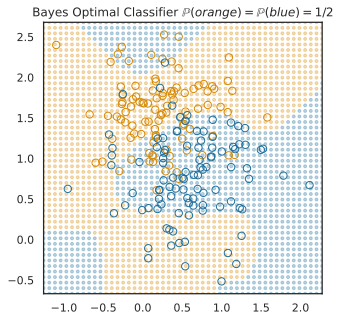

In [2]:
osl = OverviewSL()
osl.bayes_classifier()

In Chapter 6, we will discuss this _navie bayes classificier_ again, so check
chapter 6 if you want to learn more about it.